# **Regression Project: Boston House Price Prediction**


-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [ ]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
#from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Applied Data Science/Machine Learning/Boston.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,23.27,13.4
196,0.04011,80.0,1.52,0,0.4040,7.287,34.1,7.3090,2,329,12.6,4.08,33.3
293,0.08265,0.0,13.92,0,0.4370,6.127,18.4,5.5027,4,289,16.0,8.58,23.9
219,0.11425,0.0,13.89,1,0.5500,6.373,92.4,3.3633,5,276,16.4,10.50,23.0
310,2.63548,0.0,9.90,0,0.5440,4.973,37.8,2.5194,4,304,18.4,12.64,16.1
425,15.86030,0.0,18.10,0,0.6790,5.896,95.4,1.9096,24,666,20.2,24.39,8.3
31,1.35472,0.0,8.14,0,0.5380,6.072,100.0,4.1750,4,307,21.0,13.04,14.5
401,14.23620,0.0,18.10,0,0.6930,6.343,100.0,1.5741,24,666,20.2,20.32,7.2
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,3.81,48.5
414,45.74610,0.0,18.10,0,0.6930,4.519,100.0,1.6582,24,666,20.2,36.98,7.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


There are 506 rows and 13 columns. There are no null values. Ten variables are real-valued  and three are integers.  

In [ ]:
df.duplicated().sum()

0

There are no repeated rows.

Value counts of categorical variables

In [ ]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
df['RAD'].value_counts()


24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

Most localities do not bound river. The localities have either high or low accesability to higways.

In [ ]:
df['RAD'].max()

24

RAD variable has integer values from 1 to 24.

Statistical data for all the variables

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Most localities have low crime rate. Mean and 75% percentile are almost the same for CRIM

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

**Univariate Analysis**

Histogram plots of all the numerical independant variables

<Axes: xlabel='LSTAT', ylabel='Count'>

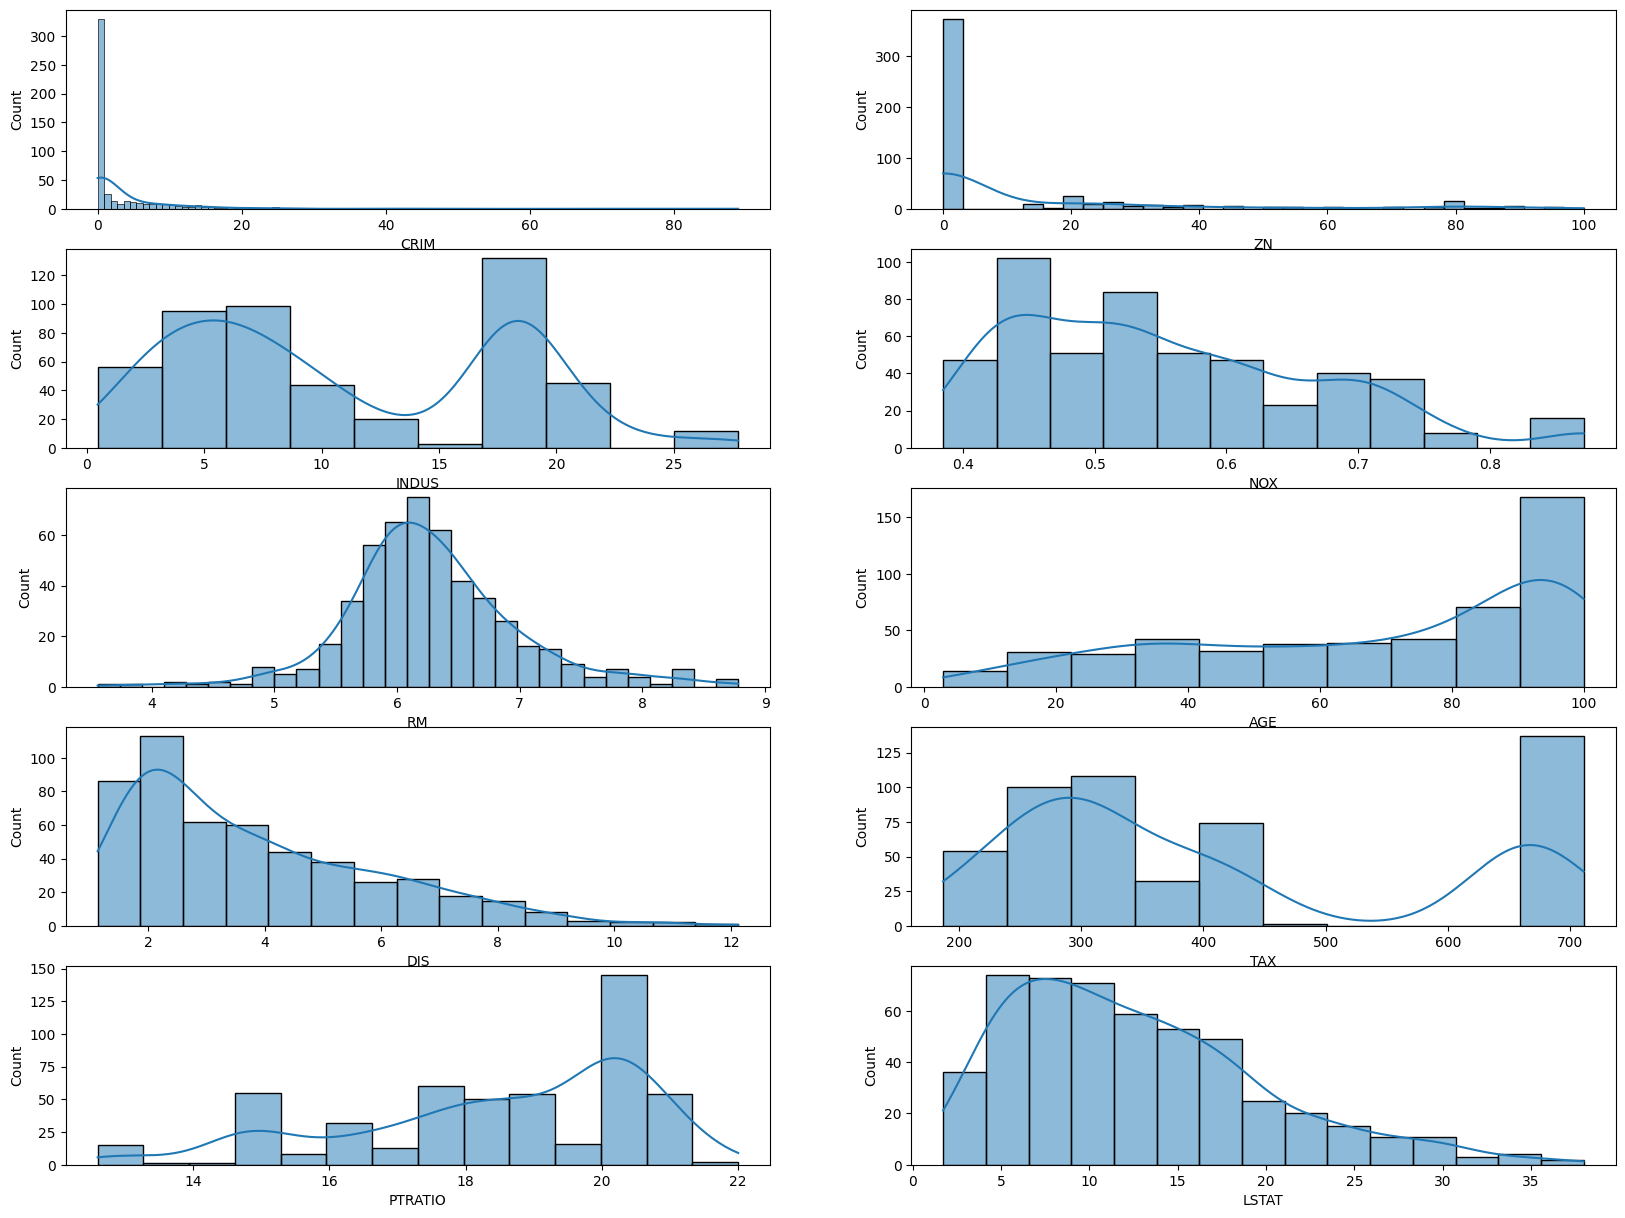

In [ ]:
fig, axs=plt.subplots(5,2,figsize=(20,15))
#plt.figure(figsize = (7, 4))
sns.histplot(data = df, x = 'CRIM', kde = True, ax=axs[0,0])
sns.histplot(data = df, x = 'ZN', kde = True, ax=axs[0,1])
sns.histplot(data = df, x = 'INDUS', kde = True, ax=axs[1,0])
sns.histplot(data = df, x = 'NOX', kde = True, ax=axs[1,1])
sns.histplot(data = df, x = 'RM', kde = True, ax=axs[2,0])
sns.histplot(data = df, x = 'AGE', kde = True, ax=axs[2,1])
sns.histplot(data = df, x = 'DIS', kde = True, ax=axs[3,0])
sns.histplot(data = df, x = 'TAX', kde = True, ax=axs[3,1])
sns.histplot(data = df, x = 'PTRATIO', kde = True, ax=axs[4,0])
sns.histplot(data = df, x = 'LSTAT', kde = True, ax=axs[4,1])



Most localities have low crime rate, as was also evident from the statistical data. Most localities also have low proportion of land zoned. Accordingly, CRIM and ZN distributions are strongly skewed to the left.  Distribution of the number of rooms looks almost normal.  INDUS and TAX have two peaks.   

Histogram plot of the dependant variable MEDV

<Axes: xlabel='MEDV', ylabel='Count'>

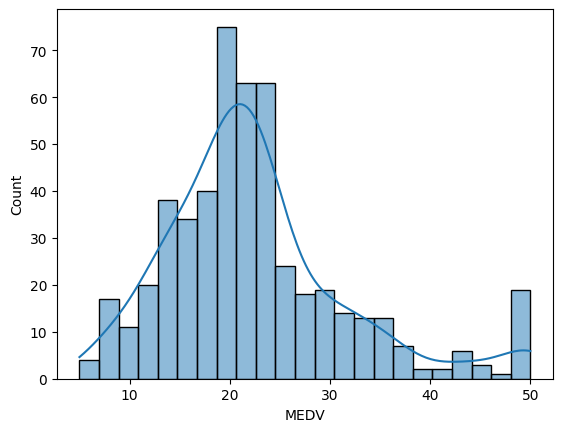

In [ ]:
sns.histplot(data = df, x = 'MEDV', kde = True)

Distribution of MEDV is slightly skewed to the right.

<Axes: xlabel='MEDV'>

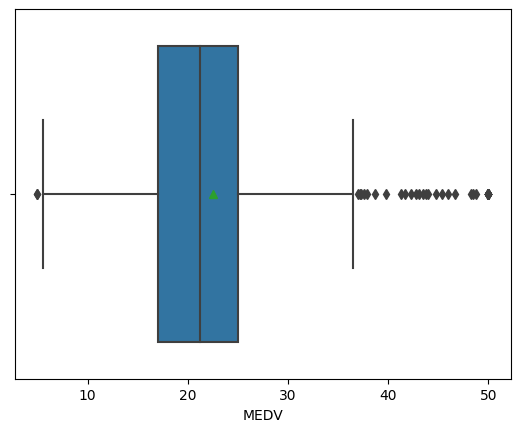

In [ ]:
#boxplot of MEDV
sns.boxplot(data = df, x = 'MEDV', showmeans = True)

Distribution of MEDV is slightly sckewed to the right. Mean is slightly higher than median.

Count plots of the two categorical independant variables

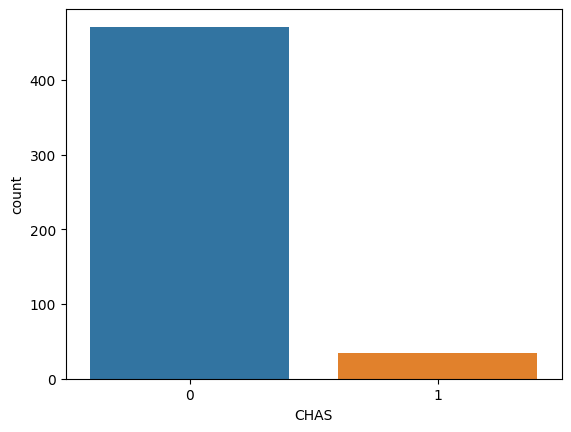

In [ ]:
ax=sns.countplot(data = df, x = 'CHAS')


In [ ]:
ax.patches[0].get_height()

471.0

In [ ]:
ax.patches[1].get_height()

35.0

Majority of localities do not border a river

<Axes: xlabel='RAD', ylabel='count'>

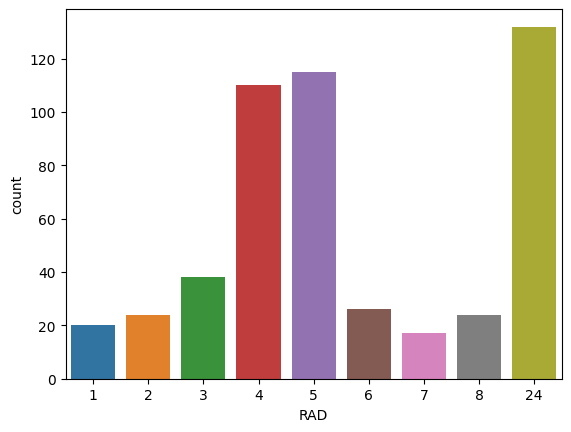

In [ ]:
sns.countplot(data = df, x = 'RAD')

The group with the closest ditance to radial highways is the largest. The remaining localities are far from highways. There seems to be no towns in between these two groups.  

## Data Preprocessing

In [ ]:
#Logarithmic transformation of MEDV
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log'>

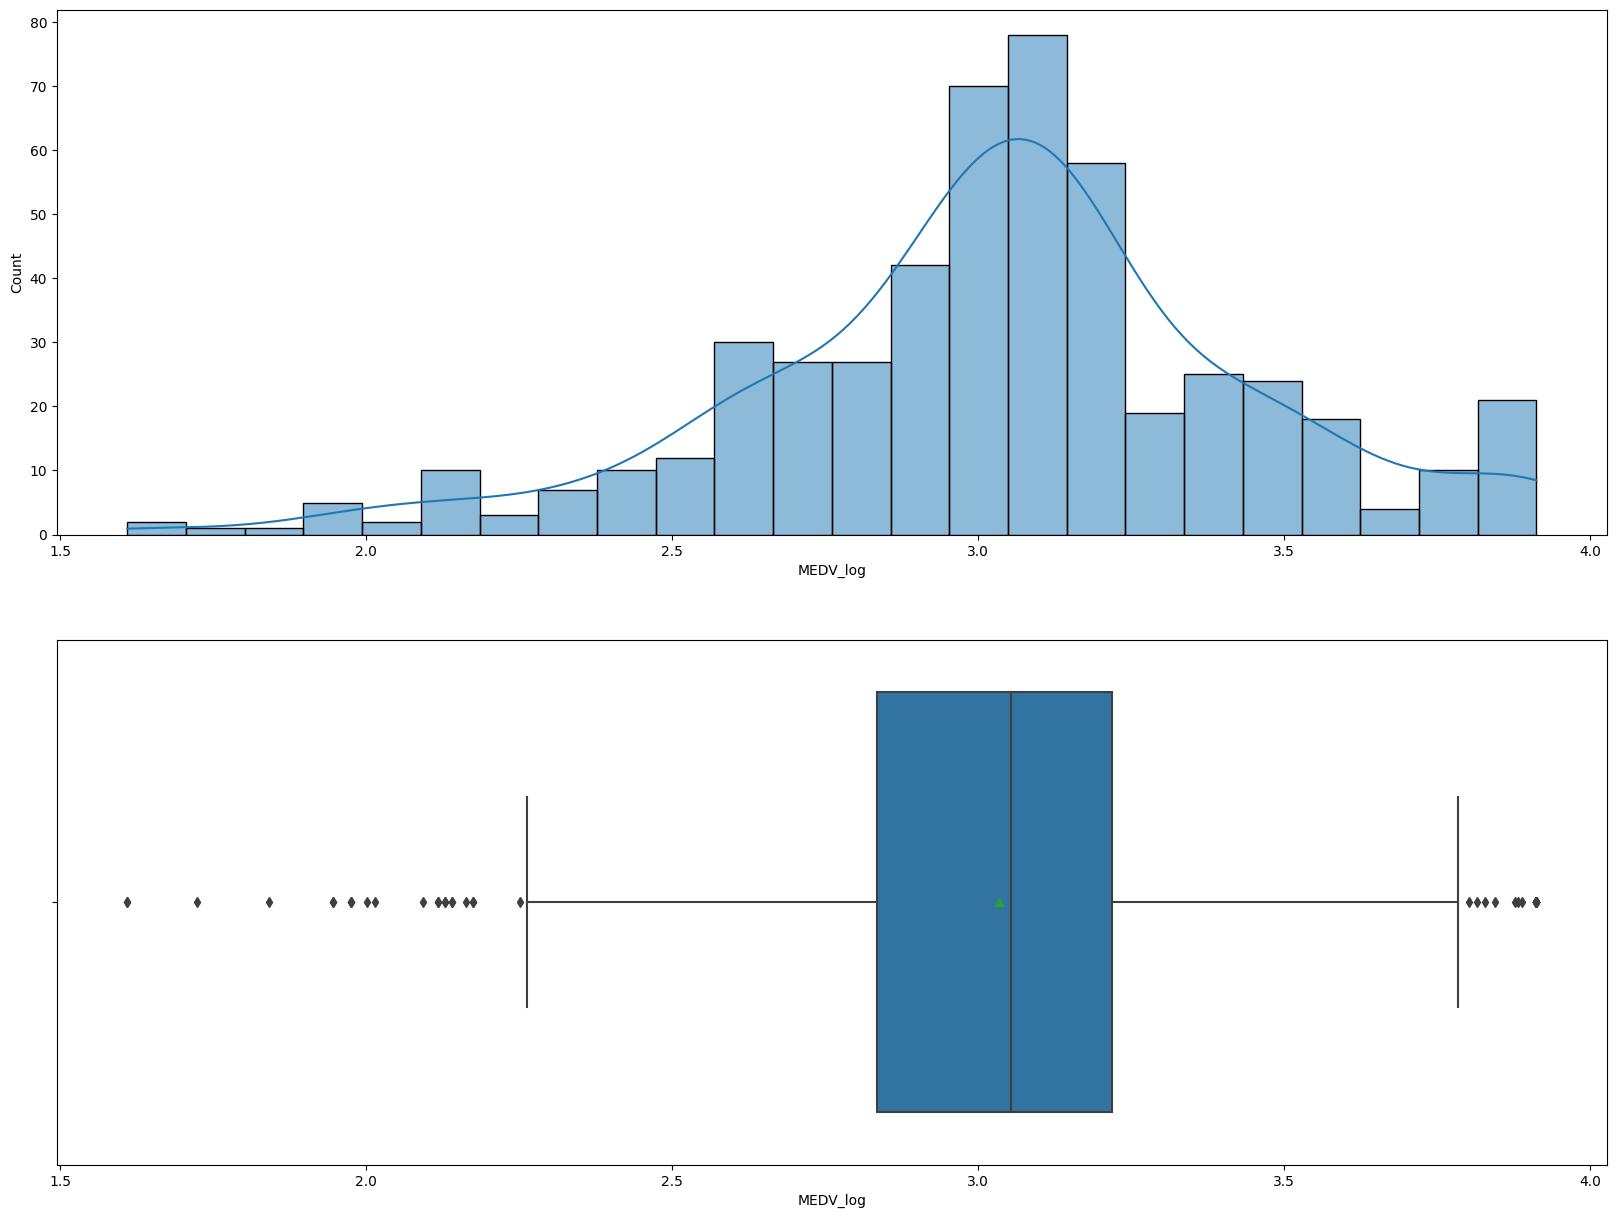

In [ ]:
#Histogram and boxplot of MEDV_log
fig, axs=plt.subplots(2,1,figsize=(20,15))
#plt.figure(figsize = (7, 4))
sns.histplot(data = df, x = 'MEDV_log', kde = True, ax=axs[0])
sns.boxplot(data = df, x = 'MEDV_log', showmeans = True, ax=axs[1])


The distribution of MEDV_log looks more normal.

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Bivariate analysis**

Correlation between the variables

In [ ]:
#Remove MEDV_log column
df1=df.loc[:, df.columns != 'MEDV_log']

In [ ]:
df1.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


<Axes: >

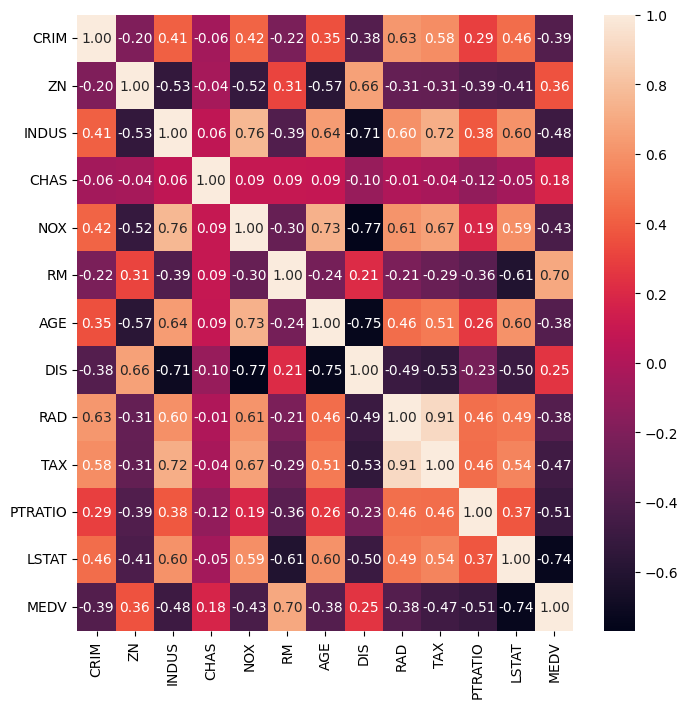

In [ ]:
plt.figure(figsize = (8, 8))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')

Variables with **correlation magnitude** greater than 0.7 are
INDUS and NOX, INDUS and DIS, INDUS and TAX, NOX and AGE, NOX and DIS, NOX and TAX, RM AND MEDV,AGE AND DIS, LSTAT AND MEDV.

Scatterplots between features with large corellations

<Axes: xlabel='LSTAT', ylabel='MEDV'>

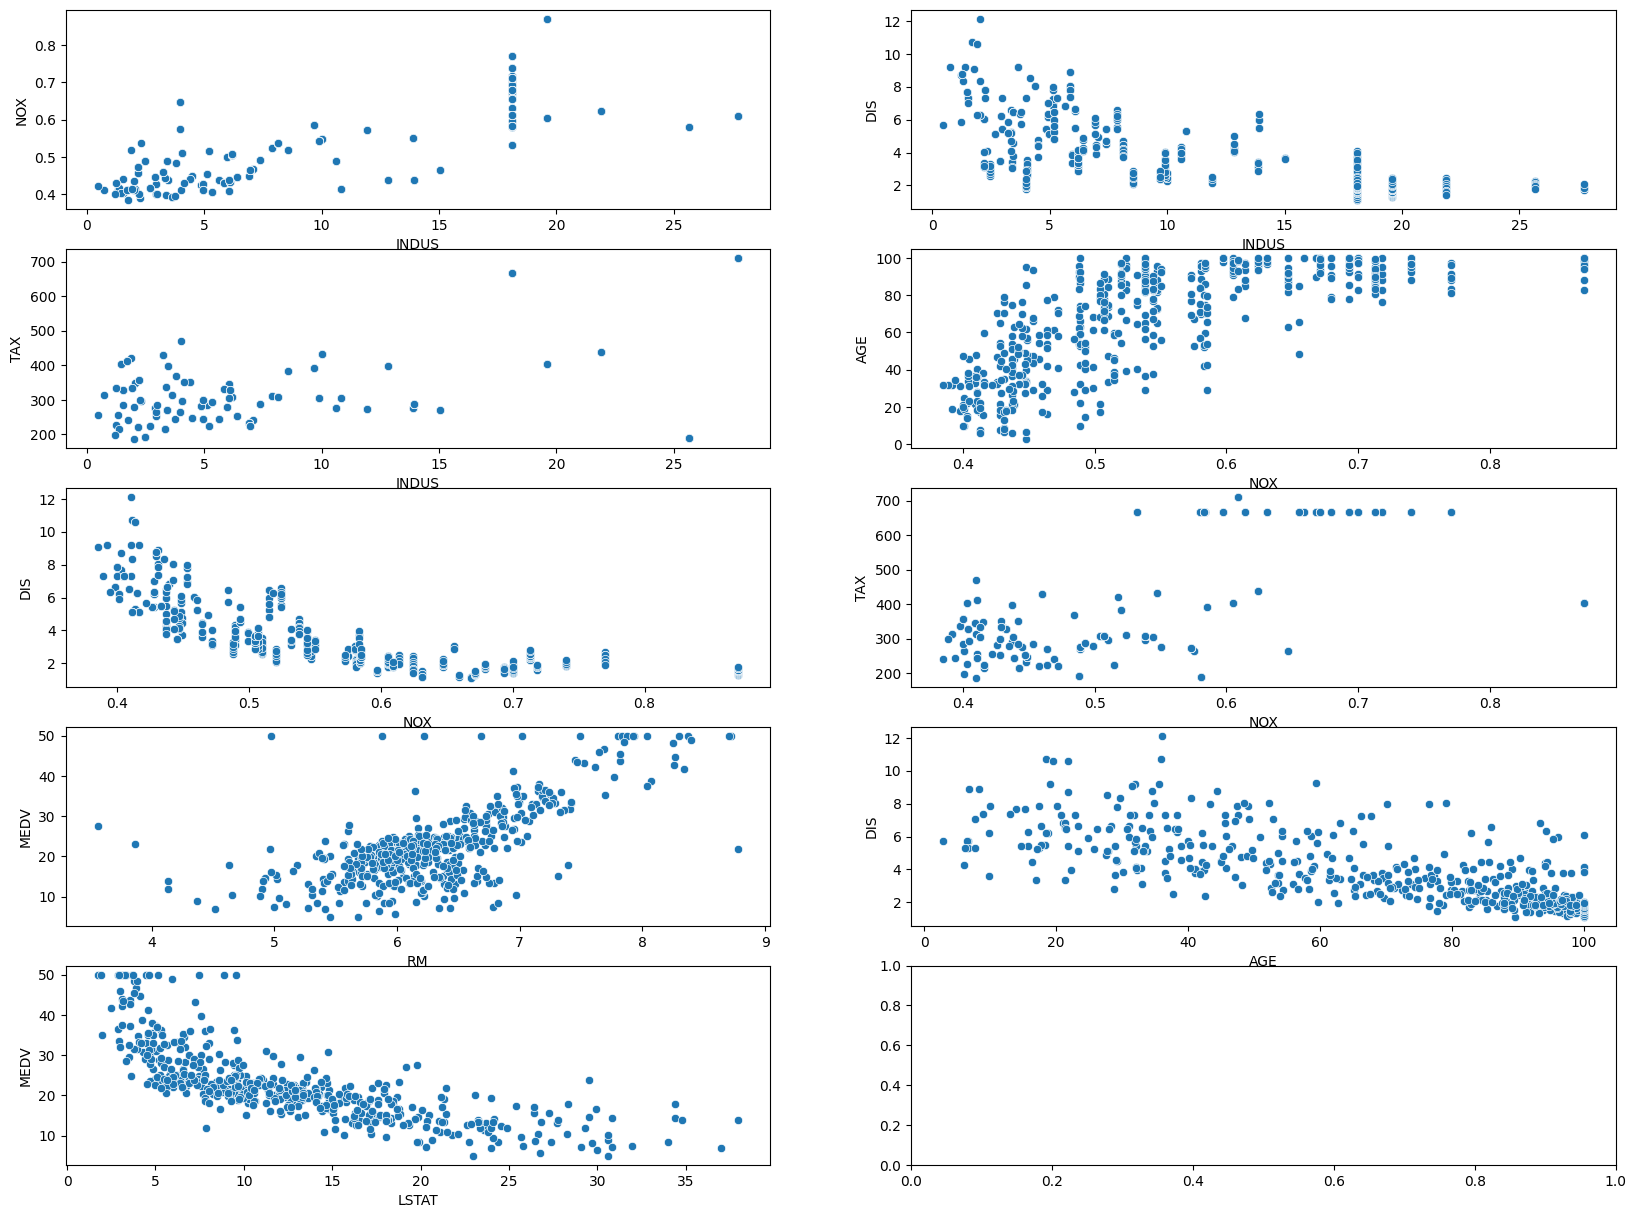

In [ ]:
fig, axs=plt.subplots(5,2,figsize=(20,15))
#plt.figure(figsize = (7, 4))
sns.scatterplot(data = df, x = 'INDUS', y='NOX', ax=axs[0,0])
sns.scatterplot(data = df, x = 'INDUS', y='DIS', ax=axs[0,1])
sns.scatterplot(data = df, x = 'INDUS', y='TAX', ax=axs[1,0])
sns.scatterplot(data = df, x = 'NOX', y='AGE', ax=axs[1,1])
sns.scatterplot(data = df, x = 'NOX', y='DIS', ax=axs[2,0])
sns.scatterplot(data = df, x = 'NOX', y='TAX', ax=axs[2,1])
sns.scatterplot(data = df, x = 'RM', y='MEDV', ax=axs[3,0])
sns.scatterplot(data = df, x = 'AGE', y='DIS', ax=axs[3,1])
sns.scatterplot(data = df, x = 'LSTAT', y='MEDV', ax=axs[4,0])
#sns.histplot(data = df, x = 'LSTAT', kde = True, ax=axs[4,1])

There seems to be a negative linear relation between Nitric Oxide concentration and distance to employment centers, and positive linear relation between Nitric Oxide concentration and age of the houses.  This makes sense, as the air quality is probably worse away from mostly residential areas.  Older houses are probably closer to employment centers.  This is indeed true based on the scatter plot between AGE and DIS.  There is a positive linear relation between the number of rooms and the price of houses, and negative linear relation between the pupil to teacher ratio and the price of houses.  This is expected, since purer neighborhoods tend to have higher pupil to teacher ratio.  The relation between the proportion of lower status residents and house price is also negative, as would be expected.  The seemingly linear relation between MEDV and LSTAT, PTRATIO, and RM would be good for linear regression.  However, several independent variables are related as well.  This is not desirable for a linear regression model.   

## Model Building - Linear Regression

In [ ]:
# Definig dependent and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [ ]:
# splitting the data: 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## Model Performance Check

In [ ]:
#Checking for multicollinearity, using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df=pd.DataFrame()
vif_df["features"]=X_train.columns
vif_df["vif"]=[variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]
print(vif_df)

   features         vif
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


RAD and TAX have VIF higher than 5. TAX will be removed in the next line, since it has higher VIF.

In [ ]:
X_train = X_train.drop(columns='TAX')

In [ ]:
#Checking for multicollinearity again, using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df=pd.DataFrame()
vif_df["features"]=X_train.columns
vif_df["vif"]=[variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]
print(vif_df)

   features         vif
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


All remaining features have VIF less than 5

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [ ]:
#Remove TAX variable from test data
X_test = X_test.drop(columns='TAX')

In [ ]:
X_test.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,LSTAT
307,1.0,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,18.4,7.53
343,1.0,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,17.6,7.18
47,1.0,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,17.9,18.80
67,1.0,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,18.9,8.10
362,1.0,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,20.2,10.19


In [ ]:
# Creating the model
model1 = sm.OLS(y_train, X_train).fit()

# Model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          1.40e-101
Time:                        22:43:19   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared value is 0.77, and adjusted R-squared value is 0.76. This indicates a good linear fit. We also see that p-values for ZN, INDUS, and AGE are higher than 0.05. Therefore, there is not enough evidence that these features have any effect on the house price value. We try a new model without ZN, INDUS, and AGE.  

In [ ]:
# Removng ZN, INDUS, and AGE from training set
X_train1 = X_train.drop(columns={"ZN", "INDUS","AGE"})

In [ ]:
# Removng ZN, INDUS, and AGE from test set
X_test1 = X_test.drop(columns={"ZN", "INDUS","AGE"})

In [ ]:
#New model
model2 = sm.OLS(y_train, X_train1).fit()

# Model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          2.61e-104
Time:                        22:43:46   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, all the p-values are below 0.05. Therefore, the remaining features are statistically significant.  

Checking model performance.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
def model_perf(model, X, y):
  y_pred=model.predict(X)
  r2=r2_score(y,y_pred)
  mse=mean_squared_error(y,y_pred)
  rmse=np.sqrt(mean_squared_error(y,y_pred))
  mae=mean_absolute_error(y,y_pred)
  mape=mean_absolute_percentage_error(y,y_pred)
  return pd.DataFrame({"R2": [r2], "MSE": [mse], "RMSE": [rmse], "MAE": [mae], "MAPE": [mape]})


In [ ]:
model_perf(model2,X_train1,y_train)

,R2,MSE,RMSE,MAE,MAPE
0,0.767174,0.038222,0.195504,0.143686,0.049818


In [ ]:
model_perf(model2,X_test1,y_test)

,R2,MSE,RMSE,MAE,MAPE
0,0.772486,0.039222,0.198045,0.151284,0.05258


R-squared values are high for both training and test data.  We also see 5% mean error in prediction for both training and test data. This is a low error.  

## Checking Linear Regression Assumptions

**Checking that average over residuals is close to zero**

In [ ]:
np.mean(model2.resid)

-2.5303049047106675e-15

Mean residual is close to zero.

**Checking for homoscedasticity**

In [ ]:
import statsmodels.stats.api as sms

print("p-value=", sms.het_goldfeldquandt(y_train, X_train1)[1])

p-value= 0.30190120067668275


p-value is greater than 0.05. Therefore, the null hypothesis that the residuals are homoscedastic stays.  

**Linearity relation of the dependent and independent variables**

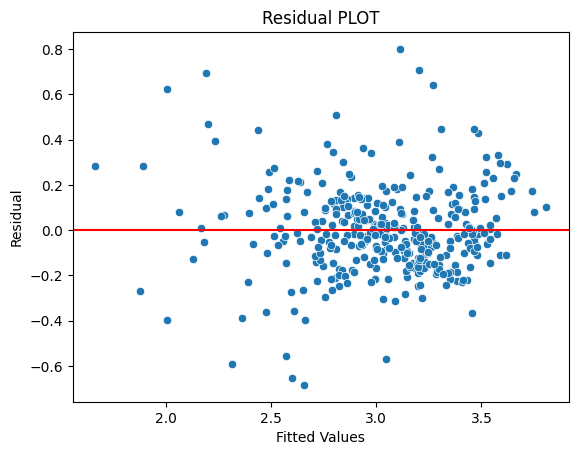

In [ ]:
plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")
sns.scatterplot(x = model2.fittedvalues, y=model2.resid)
plt.axhline(0,color='r')
plt.show()

Residuals seem to be randomly scattered around the x-axis. Therefore, linearity of the modle is varified.  

**Cheking normality of residuals**

<Axes: ylabel='Count'>

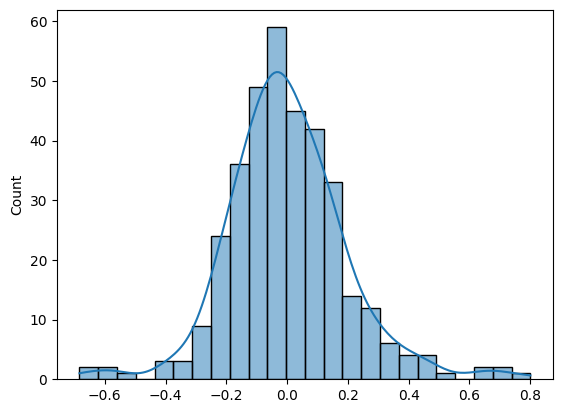

In [ ]:
sns.histplot(model2.resid, kde = True)

The histogram plot shows that residuals' distribution is very close to normal.

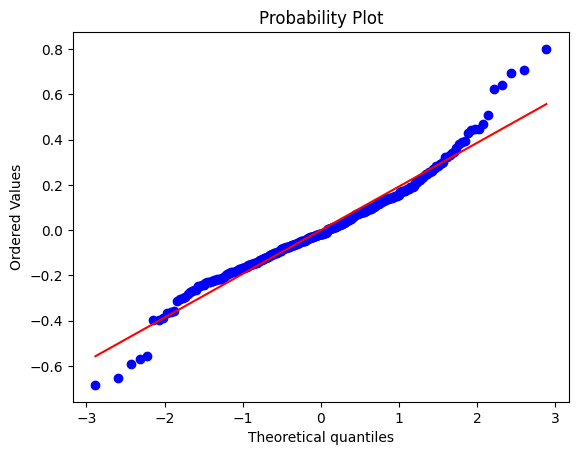

In [ ]:
import pylab

import scipy.stats as stats
stats.probplot(model2.resid, dist = "norm", plot = pylab)
plt.show()

Quantile-quantile plot shows that residuals follow a normal  distribution very closely.   

**Checking the model performance by cross-validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))


RSquared: 0.727 (+/- 0.240)
Mean Squared Error: 0.041 (+/- 0.024)


The R2-value reduced slightly, but mean squared error remained the same as for test data.  

## Actionable Insights and Recommendations

The model can be used to predict housing prices in a town or suburb based on the information provided about this town. The model explains about 73% of the variation in the data.

The data does not support the evidence that proportions of rezidential land zoned and non-retailed business acres, as well as the age of housing influence the housing prices. Based on correlation results, the housing prices are mostly affected by the number of rooms and the proportion of low-status residents.

___